# Testing QISKit installation and API setup

In [1]:
%matplotlib inline
from qiskit import Aer
from qiskit import IBMQ
# Authenticate an account and add for use during this session. Replace string
# argument with your private token.
IBMQ.enable_account("INSERT_YOUR_API_TOKEN_HERE") 

/Users/corbett/Documents/Mastering-Quantum-Computing-with-IBM-QX/book/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


# Running a Quantum Program Using IBM QX API

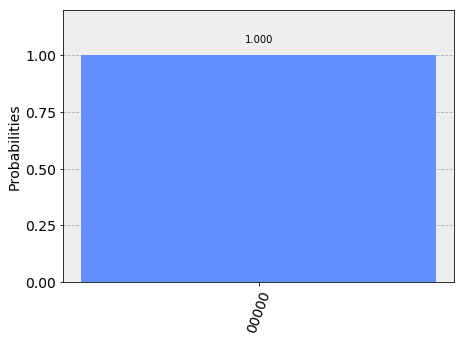

In [2]:
import time
import qiskit
from qiskit.tools.visualization import plot_histogram

# Pick an available backend
backend = IBMQ.get_backend('ibmq_qasm_simulator')

# Setup 5 quantum and 5 classical registers, performing a measurement
q = qiskit.QuantumRegister(5)
c = qiskit.ClassicalRegister(5)
qc = qiskit.QuantumCircuit(q, c)
qc.measure(q, c)

# Executing the job on IBM QX
job_exp = qiskit.execute(qc, backend=backend)
plot_histogram(job_exp.result().get_counts(qc))


# Working with QASM
## From a file

In [3]:
import qiskit
from qiskit import QuantumCircuit
qc = QuantumCircuit.from_qasm_file("reversible.qasm")
# Run on local simulator
backend= Aer.get_backend('qasm_simulator')
sim = qiskit.execute(qc, backend=backend)
result = sim.result()
# Output result
print(result.get_counts(qc))

{'00000': 1024}


## From a string

In [4]:
import qiskit
from qiskit import QuantumCircuit
qasm_string="""
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
x q[0];
x q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
"""
backend= Aer.get_backend('qasm_simulator')
qc = qiskit.wrapper.load_qasm_string(qasm_string)
# Run on local simulator

sim = qiskit.execute(qc, backend=backend)
result = sim.result()
# Output result
print(result.get_counts(qc))

{'11': 1024}


/Users/corbett/Documents/Mastering-Quantum-Computing-with-IBM-QX/book/lib/python3.7/site-packages/qiskit/wrapper/_wrapper.py:30: DeprecationWarning: The load_qasm_string() function is deprecated and will be removed in a future release. Instead use QuantumCircuit.from_qasm_str().
  'QuantumCircuit.from_qasm_str().', DeprecationWarning)


In [5]:
import numpy
import pygame, pygame.sndarray
import pickle

def play_notes(freqs,volumes):
    """
    freqs: a list of frequencies in Hz 
    volumes a list of volumes: (1 highest 0 lowest)
    example usage:
    play_notes([440,880],[0.6,0.2])

    """
    pygame.mixer.init()
    sample_wave=sum([numpy.resize(volume*16384*numpy.sin(numpy.arange(int(44100/float(hz)))*numpy.pi*2/(44100/float(hz))),(44100,)).astype(numpy.int16) for hz,volume in zip(freqs,volumes)])
    stereo = numpy.vstack((sample_wave, sample_wave)).T.copy(order='C')
    sound = pygame.sndarray.make_sound(stereo)
    sound.play(-1)
    pygame.time.delay(1000)
    sound.stop()
    pygame.time.delay(1000)

def quantum_play_notes(qc,shots):
    """
    qc: the quantum circuit of 7 qubits
    shots: the number of times to prepare and perform the circuit computation

    The quantum state is prepared <shots> number of times. 
    
    The result of the measurement each time is played as a single note.
    
    """
    midi_conversion_tables=pickle.load(open('midi_conversion_tables.p','rb'))        
    midi_to_note_bin=midi_conversion_tables['midi_to_note_bin']
    midi_to_frequency_bin=midi_conversion_tables['midi_to_frequency_bin']

    backend= Aer.get_backend('qasm_simulator')
    for i in range(shots):
        # Note shots=1 may result in a deprecation warning, which will go away in a future code version.
        sim = qiskit.execute(qc,backend=backend,shots=1)
        result = sim.result()
        final=result.get_counts(qc)
        [print(midi_to_note_bin[k]) for k in final.keys()]
        play_notes([float(midi_to_frequency_bin[k]) for k in final.keys()],[1.0])


def quantum_play_chords(qc,shots):
    """
    qc: the quantum circuit of 7 qubits
    shots: the number of times to prepare and perform the circuit computation

    The quantum state is prepared <shots> number of times.
    
    This method helps to hear the outcome of the <shots> measurements together by producing 
    a chord where each note in the chord is a measurement result and the maximum volume of the note
    is reduced the fraction of the times the note appears in <shots> measurement.
    """
    midi_conversion_tables=pickle.load(open('midi_conversion_tables.p','rb'))        
    midi_to_note_bin=midi_conversion_tables['midi_to_note_bin']
    midi_to_frequency_bin=midi_conversion_tables['midi_to_frequency_bin']

    
    backend= Aer.get_backend('qasm_simulator')
    sim = qiskit.execute(qc, backend=backend,shots=shots)
    result = sim.result()
    final=result.get_counts(qc)

    freqs=[]
    volumes=[]
    for k,v in final.items():
        try:
            freqs+=[float(midi_to_frequency_bin[k])]
            volumes+=[int(v)/shots]
            print('%f percent' % (int(v)/shots*100),midi_to_note_bin[k])
        except:
            print('%f percent' % (int(v)/shots*100),k)
    play_notes(freqs,volumes)




pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
import qiskit
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute

# set up registers and program
qr = QuantumRegister(7)
cr = ClassicalRegister(7)
qc = QuantumCircuit(qr, cr)

# F4 and A4 together:
qc.x(qr[0]) # 1 at qubit 0
qc.x(qr[6]) # 1 at qubit 6
qc.h(qr[2]) # create superposition on qubit 2

for j in range(7):
    qc.measure(qr[j], cr[j])


In [7]:
quantum_play_notes(qc,4)
quantum_play_chords(qc,4)

A4
F4
A4
A4
50.000000 percent A4
50.000000 percent F4


In [8]:
import qiskit
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute

# set up registers and program
qr = QuantumRegister(7)
cr = ClassicalRegister(7)
qc = QuantumCircuit(qr, cr)

qc.x(qr[4]) # 1 at qubit 4
qc.x(qr[5]) # 1 at qubit 5
qc.h(qr[2]) # create a superposition on qubit 2
qc.h(qr[3]) # create a superposition on qubit 3

for j in range(7):
    qc.measure(qr[j], cr[j])


In [9]:
quantum_play_notes(qc,4)
quantum_play_chords(qc,45)

C3
E3
C4
C3
26.666667 percent E3
24.444444 percent C3
28.888889 percent G#3
20.000000 percent C4
